<a href="https://colab.research.google.com/github/mlandi75/mlandi75/blob/main/HiddenMArkovModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.4 MB/s eta 0:00:00


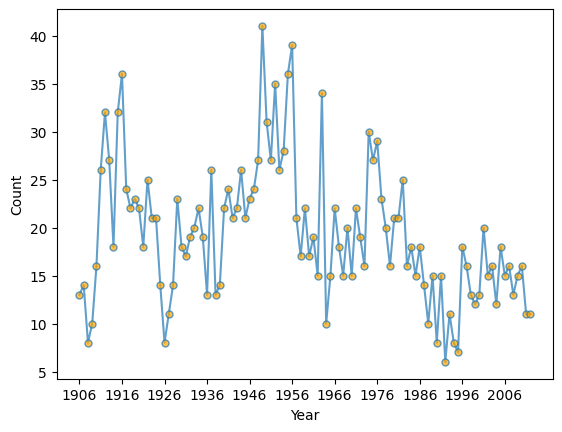

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson
from hmmlearn import hmm

# earthquake data from http://earthquake.usgs.gov/
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])


# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(earthquakes, ".-", ms=10, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, earthquakes.size, 10))
ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()

Fitting hidden Markov Model

In [5]:
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -341.89397049875356
Converged: True		Score: -341.88244772721345
Converged: True		Score: -342.1445482378539
Converged: True		Score: -341.8929674859702
Converged: True		Score: -341.88555381993297
Converged: True		Score: -342.28762276127696
Converged: True		Score: -342.53692921035895
Converged: True		Score: -341.88750207762115
Converged: True		Score: -341.8789363379968
Converged: True		Score: -342.9703881743695
Converged: True		Score: -343.04291690398713
Converged: True		Score: -342.0845203955179
Converged: True		Score: -342.6892743201992
Conv

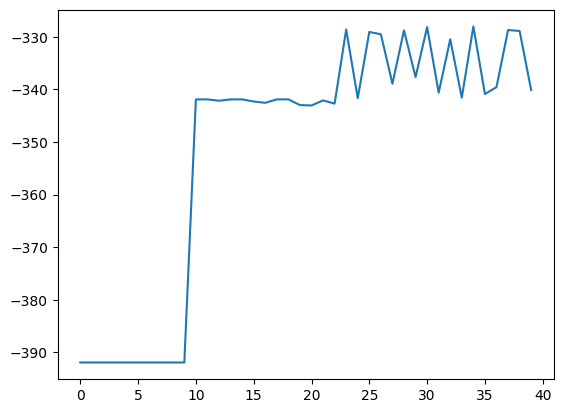

In [8]:
fig, ax = plt.subplots()
ax.plot(scores)

In [13]:
model.get_params()

{'algorithm': 'viterbi',
 'implementation': 'log',
 'init_params': 'stl',
 'lambdas_prior': 0.0,
 'lambdas_weight': 0.0,
 'n_components': 4,
 'n_iter': 10,
 'params': 'stl',
 'random_state': RandomState(MT19937) at 0x7F7FDB710D40,
 'startprob_prior': 1.0,
 'tol': 0.01,
 'transmat_prior': 1.0,
 'verbose': False}

Text(0.5, 0, 'State')

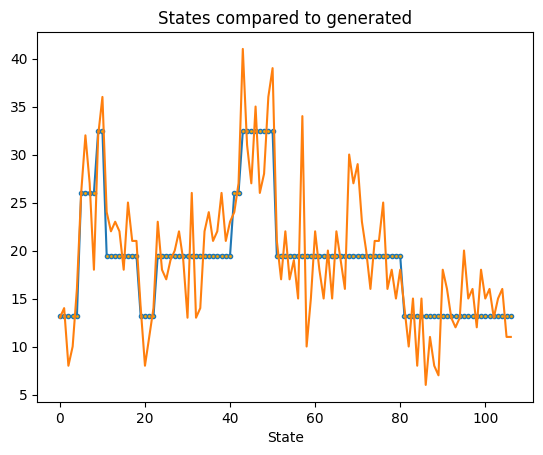

In [14]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_xlabel('State')